# Comparação entre o crescimento da rede de acesso público e a frota elétrica em Portugal


## Resumo

Com base nos dados disponibilizados pela MobiE no seu portal MobiData, verificamos que entre 2020 e 2023 houve uma taxa de crescimento anual média de 101.6% no número de utilizadores da rede de acesso público. Por outro lado, o número de tomadas de carregamento cresceu apenas 70.5% ao ano nas mesmas condições. Por outras palavras, as necessidades de carregamento estão a aumentar e continuam a aumentar mais rapidamente do que as oportunidades de carregamento, e a diferença é cada vez mais significativa. Ao longo dos últimos 3 anos, esta diferença levou a que o número de tomadas disponíveis por 1000 utilizadores tenha descido de 210 para 127 tomadas.


## Fontes de dados

1. Mobi.Data [(link)](https://www.mobie.pt/mobidata/data)
    * Número de tomadas: tab "Mobilidade" -> "Rede de Acesso Público" -> "# Tomadas" -> Filtros (2020, 2021, 2022, 2023)
    * Número de tomadas: tab "Mobilidade" -> "Rede de Acesso Público" -> "# Utilizadores" -> Filtros (2020, 2021, 2022, 2023)

### Notas

* Dados oficiais do portal MobiData da MobiE, a Entidade Gestora da Mobilidade Elétrica em Portugal.
* O número de tomadas reflete as tomadas efetivamente utilizadas, excluindo as inoperacionais.
* O número de utilizadores reflete o número de utilizadores que realmente acede à rede pública.
* Os dados mais antigos com fiabilidade são de 2020, ano em que todos os carregamentos passaram a ser pagos.
* Para esta análise foram extraídos os dados anualmente de Julho.
* Todos os dados foram extraídos a 2023-08-21.


## Análise

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from IPython.display import display


def cagr(dataframe, variable):
    """Compound Annual Growth Rate"""
    return (dataframe[variable].iat[-1] / dataframe[variable].iat[0]) ** (1 / (dataframe.shape[0] - 1)) - 1


Em primeiro lugar, os dados extraídos:

In [2]:
df = pd.read_csv("notebooks/mobidata/data/mobidata_utilizadores_tomadas.csv")
df["Data"] = pd.to_datetime(df["Data"]).dt.year

display(
    df
    .set_index("Data")
)

df["MilUtilizadores"] = df["Utilizadores"] / 1_000
df["MilTomadas"] = df["Tomadas"] / 1_000
df["EnergiaGWh"] = df["Energia"] / 1_000_000

df["UtilizadoresPorTomada"] = df["MilUtilizadores"] / df["Tomadas"]
df["TomadasPorUtilizador"] = (df["Tomadas"] / df["MilUtilizadores"]).round(1)
df["TomadasPorGWh"] = (df["Tomadas"] / df["EnergiaGWh"]).round(1)

df["CrescimentoTomadasPorUtilizador"] = (
    (df["TomadasPorUtilizador"] - df["TomadasPorUtilizador"].shift(1)) / df["TomadasPorUtilizador"].shift(1) * 100
).round(1)


,Tomadas,Utilizadores,Energia
Data,,,
2020,1479,7038,701003
2021,3318,20158,1723401
2022,5239,36100,3400948
2023,7330,57647,6147042


Em 2020 tínhamos 1479 tomadas e a Julho de 2023 são 7330. O número de utilizadores subiu de 7038 para 57647 no mesmo período de tempo.

Se visualizarmos os dados acima, verificamos um crescimento sustentado tanto em tomadas como em utilizadores. A figura abaixo mostra esse crescimento.

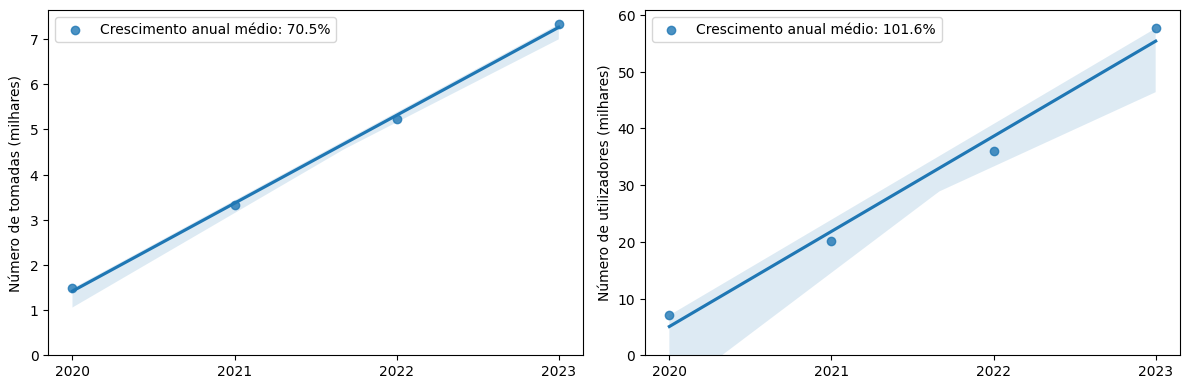

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Growth calculation
cagr1 = cagr(df, "Tomadas") * 100
cagr2 = cagr(df, "MilUtilizadores") * 100

# Plots
sns.regplot(df, x="Data", y="MilTomadas", ax=ax1, label=f"Crescimento anual médio: {cagr1:.1f}%")
sns.regplot(df, x="Data", y="MilUtilizadores", ax=ax2, label=f"Crescimento anual médio: {cagr2:.1f}%")

ax1.set_ylabel("Número de tomadas (milhares)")
ax2.set_ylabel("Número de utilizadores (milhares)")


for ax in (ax1, ax2):
    ax.legend()
    ax.set_xticks(df["Data"])
    ax.set_ylim([0, ax.get_ylim()[1]])
    ax.set_xlabel("")

plt.tight_layout()

Embora haja um crescimento sustentado nestas duas variáveis, as taxas de crescimento são distintas. 

Enquanto o número de tomadas disponíveis aumentou uma média de 70.5% ao ano entre 2020 e 2023, o número de utilizadores aumentou 101.6%! O gráfico abaixo mostra como evoluiu a diponibilidade de tomadas por utilizador durante este mesmo período.


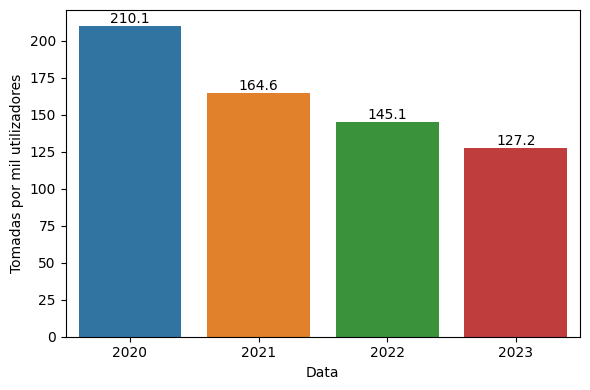

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


sns.barplot(df, x="Data", y="TomadasPorUtilizador", ax=ax)
ax.set_ylabel("Tomadas por mil utilizadores")
_ = ax.bar_label(ax.containers[0])

plt.tight_layout()


A disponibilidade efetivamente decresceu de 210 para 127 tomadas por 100 utilizadores entre 2020 e 2023, reflexo das diferenças entre o crescimento da rede de carregamento e do número de utilizadores da rede. A rede perdeu e continua a perder anualmente 15% de disponibilidade de carregamento. A verificar-se uma continuação da deterioração do número de carregadores por utilizador para os próximos anos, prevêem-se cada vez mais dificuldades na disponibilidade de carregadores. 

Estas estatísticas não refletem diferenças sazonais, regionais ou de potência disponível, pelo que a experiência individual dos utilizadores pode variar drasticamente.

## Críticas

### "O número de utilizadores está sobrevalorizado pois cada utilizador na MobiE pode ter múltiplos cartões"

A MobiE não clarifica se o número de utilizadores reflete o número de cartões ou NIFs distintos nas transações, pelo que é a crítica pode ser válida. No entanto, mesmo que o número de utilizadores esteja sobrevalorizado e haverem mais tomadas por utilizador do que as métricas mostram, a tendência de decréscimo da disponibilidade é exatamente a mesma. 

Se fizermos a mesma análise mas trocarmos o número de utilizadores pela energia transacionada, verificamos que a energia teve um crescimento médio anual de 106% -- ligeiramente acima do aumento do número de utilizadores, que subiu 102%. A nova métrica mostra uma queda média anual de 17% no número de tomadas necessárias para entregar 1 GWh, tendo descido 2110 tomadas por GWh em 2020 para 1192 por GWh em 2023, conforme mostrado nas figuras abaixo.

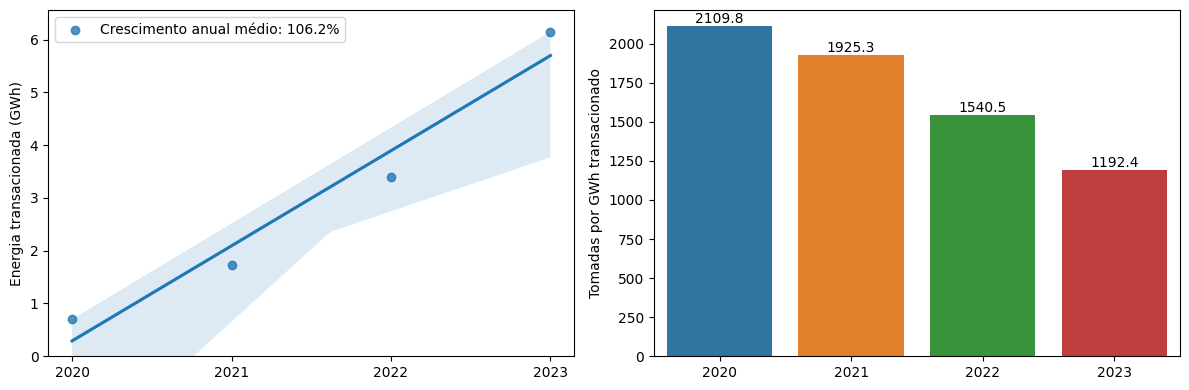

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Growth calculation
cagr1 = cagr(df, "EnergiaGWh") * 100

# Plots
sns.regplot(df, x="Data", y="EnergiaGWh", ax=ax1, label=f"Crescimento anual médio: {cagr1:.1f}%")
sns.barplot(df, x="Data", y="TomadasPorGWh", ax=ax2)

ax1.set_ylabel("Energia transacionada (GWh)")

ax2.set_ylabel("Tomadas por GWh transacionado")
ax2.bar_label(ax2.containers[0])

ax1.legend()
ax1.set_xticks(df["Data"])
ax1.set_ylim([0, ax1.get_ylim()[1]])
ax1.set_xlabel("")
ax2.set_xlabel("")

plt.tight_layout()

------

Data de publicação: 2023-08-21

Data da última atualização: 2023-08-22

Autor: Miguel Simão